#Data Science Lifecycle
© 2024, Zaka AI, Inc. All Rights Reserved.

---
##Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models. We will need from it the following functions: LabelEncoder, train_test_split, LogisticRegression, and accuracy_score

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes
Don't forget to print the head of your dataset to get a better insight into it.

In [ ]:
# Mounting google drive to access data sets
from google.colab import drive
drive.mount('/content/drive')


# Changing the working directory to read the data sets
%cd /content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module1

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#combined_df = pd.concat([train_df, test_df], axis=0)
combined_df = pd.concat([train_df, test_df], ignore_index=True) # continous index

#combined_df = train_df.append(test_df).    "append is deleted in python2+"

combined_df.head(20)
#combined_df.tail(20)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module1


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# 3. Exploratory Data Analysis


Start by getting the number of rows and the number of columns that you have in your dataset

In [ ]:
# Getting the number of rows and columns

rows = combined_df.shape[0]
columns = combined_df.shape[1]

print('There are {} rows and {} columns in the combined data set.'.format(rows,columns))

There are 614 rows and 13 columns in the combined data set.


##### Use the function info(), to check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [ ]:
#Using the info function to check for information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Where did you find some missing values?     

**Some missing values were found in the features Gender, Married, Loan_Amount_Term, Dependents, Self_Employed, Loan_Amount and Credit_History. Count of values in the first three is still in the 600's range while it is below that in the last four.**



##### Use the function describe(), to check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [ ]:
#Using the describe function to check statistical values of each numerical feature
combined_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Print the unique values of the variable Credit_History

In [ ]:
#Using the unique function to print unique values in the Credit_History column
combined_df['Credit_History'].unique()

array([ 1.,  0., nan])

Do the same with the variable Loan_Amount_Term

In [ ]:
#Repeating the previous step to the Loan_Amount_Term column
combined_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

##### Use the function describe(include='o'), to check the following  values for each categorical feature:
* count
* unique
* top
* freq


In [ ]:
#Checking count, unique, top and freq values of catergorical data
combined_df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Interpret the results you obtained for the variable Gender

**The total count of Gender values is 601 which means that 13 cells are missing. It is fitting that there are only two unique values in that column as it can either represent a female or male, incase of our dataset, information about males outweighs ones about females. The count of values for men is equal to 489, making approximately 80% of the total count.**

Compute the frequency for each unique value in the categorical feature specified in the code cells below

In [ ]:
#Using value.counts function to compute the frequency of for each unique value in Property_Area column
combined_df['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
#Repeating the previous step for the column Dependents
combined_df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


Create a new dataframe removeNA_df, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way

In [ ]:
#Creating a new dataframe to hold the combined dataframe but without null values
removeNA_df = combined_df.dropna()

removeNA_df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


Plot the distribution and the boxplot for the variable 'LoanAmount'

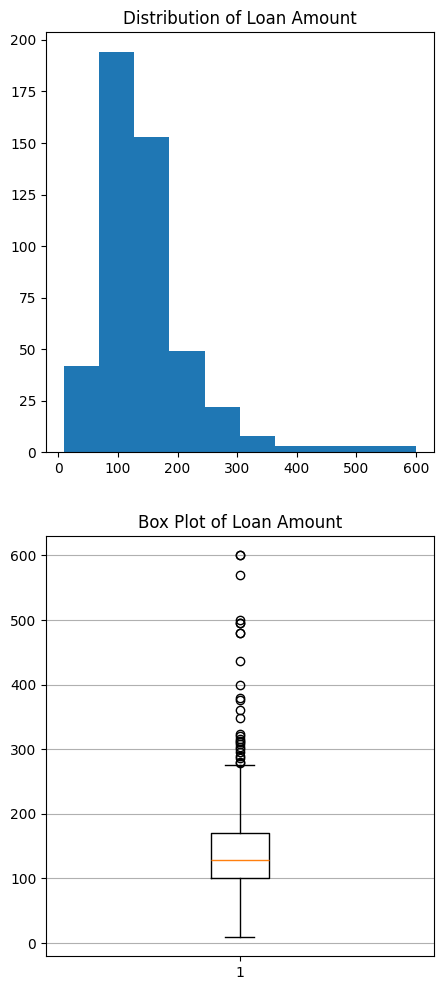

In [ ]:
# create the figure
fig = plt.figure(figsize=(5,12))

# add first sub plot for distribution
ax = fig.add_subplot(211)
# draw a histogram to show distribution of LoanAmount
ax.hist(removeNA_df["LoanAmount"])
# set sub plot title
ax.set_title('Distribution of Loan Amount')

# add second sub plot to draw a box plot for Loan Amount
ax = fig.add_subplot(212)
# draw a box plot to show distribution of LoanAmount
ax.boxplot(removeNA_df["LoanAmount"])
# set sub plot title
ax.set_title('Box Plot of Loan Amount')

ax.grid(axis='y')

# show the figure
plt.show()

* Is there any outlier?
* Is the data skewed?

**Both plots show that most of the loan amount values lie between the range of 10 and 300 (currency units), meaning that the outliers exist in loan amount values greater than 300. Since the median value is around 140 (currency units) and is closer to the minimum value, the loan amount data is postively skewed.**

Do the same for the variable 'ApplicantIncome'

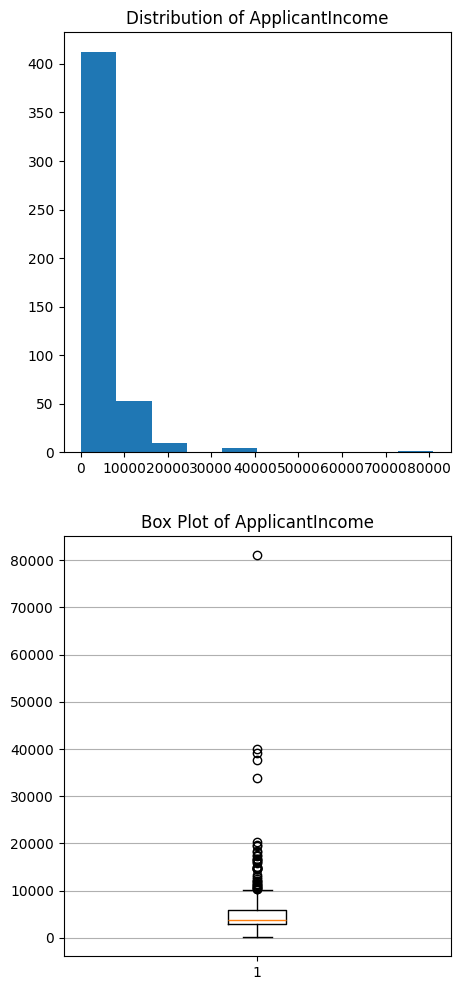

In [ ]:
# create the figure
fig = plt.figure(figsize=(5,12))

# add first sub plot for distribution
ax = fig.add_subplot(211)
# draw a histogram to show distribution of ApplicantIncome
ax.hist(removeNA_df["ApplicantIncome"])
# set sub plot title
ax.set_title('Distribution of ApplicantIncome')

# add second sub plot to draw a box plot for ApplicantIncome
ax = fig.add_subplot(212)
# draw a box plot to show distribution of ApplicantIncome
ax.boxplot(removeNA_df["ApplicantIncome"])
# set sub plot title
ax.set_title('Box Plot of ApplicantIncome')

ax.grid(axis='y')

# show the figure
plt.show()

* Is there any outlier?
* Is the data skewed?

**The histogram shows that the majority of applicants have an income less than 10K, with a few having income between 10K and 20K.Both plots suggest that income values greater than 20K are outliers. Similar to the Loan Amount distribtution, the Applicant Income data is positively skewed.**

Do the same for 'CoapplicantIncome'

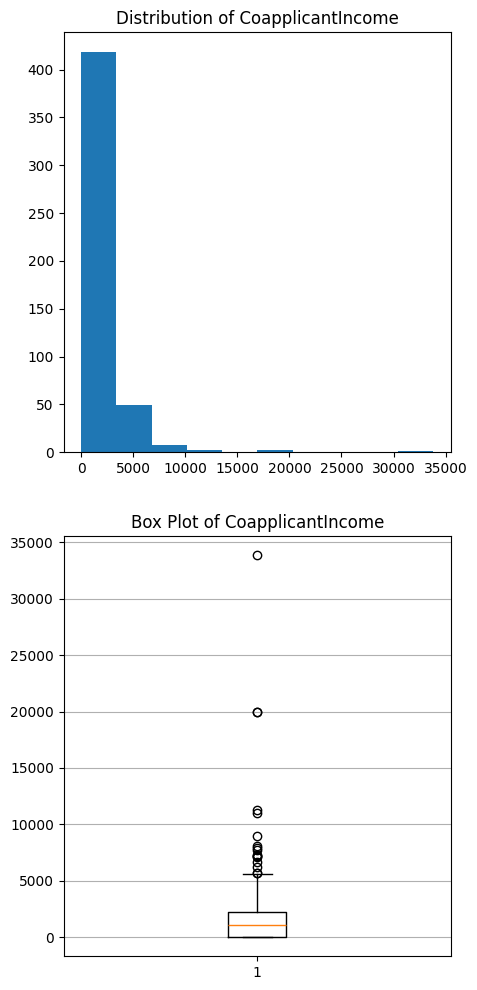

In [ ]:
# create the figure
fig = plt.figure(figsize=(5,12))

# add first sub plot for distribution
ax = fig.add_subplot(211)
# draw a histogram to show distribution of CoapplicantIncome
ax.hist(removeNA_df["CoapplicantIncome"])
# set sub plot title
ax.set_title('Distribution of CoapplicantIncome')

# add second sub plot to draw a box plot for CoapplicantIncome
ax = fig.add_subplot(212)
# draw a box plot to show distribution of CoapplicantIncome
ax.boxplot(removeNA_df["CoapplicantIncome"])
# set sub plot title
ax.set_title('Box Plot of CoapplicantIncome')

ax.grid(axis='y')

# show the figure
plt.show()

**Coapplicant income distribution is quite similar to that of applicant income with approximately same number of outliers. An important note is that the minimum value is equal to the first quartile, which may be due to the median being a very low amount to begin with. I'm curious to know about the gender of coapplicants as the distribution in both plots suggests they earn about half of what the main applicants earn.**

Do the same for 'Loan_Amount_Term'

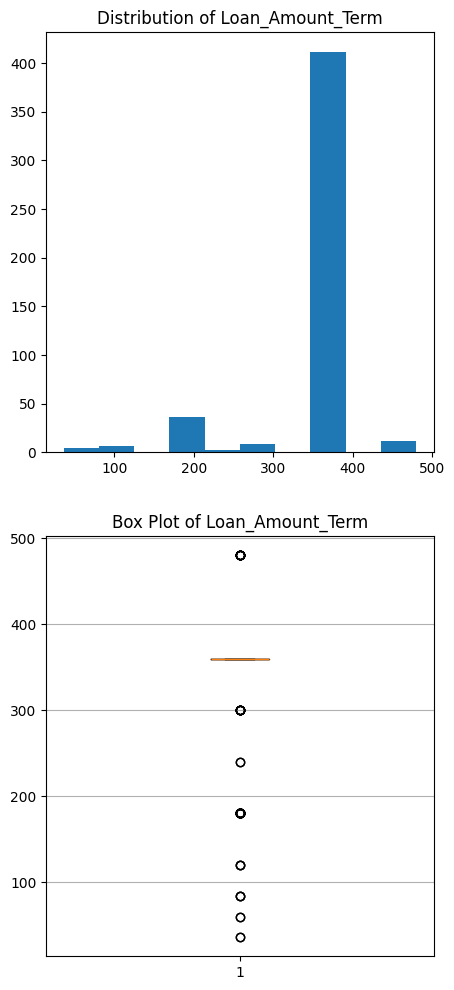

In [ ]:
# create the figure
fig = plt.figure(figsize=(5,12))

# add first sub plot for distribution
ax = fig.add_subplot(211)
# draw a histogram to show distribution of Loan_Amount_Term
ax.hist(removeNA_df["Loan_Amount_Term"])
# set sub plot title
ax.set_title('Distribution of Loan_Amount_Term')

# add second sub plot to draw a box plot for Loan_Amount_Term
ax = fig.add_subplot(212)
# draw a box plot to show distribution of Loan_Amount_Term
ax.boxplot(removeNA_df["Loan_Amount_Term"])
# set sub plot title
ax.set_title('Box Plot of Loan_Amount_Term')

ax.grid(axis='y')

# show the figure
plt.show()

What do you think about outliers in this case?

**The box is empty and there are not wiskers, it seems outliers will not make a difference in this case. I am not sure if this means that the outlier points are the data points we care about.**   

Plot the value_counts for 'Loan_Amount_term'

<Axes: xlabel='Loan_Amount_Term'>

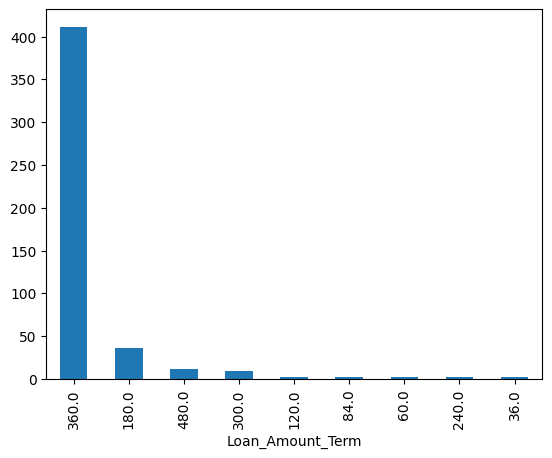

In [ ]:
#Plotting the value_counts for Loan Amount term
removeNA_df['Loan_Amount_Term'].value_counts().plot(kind='bar')

Do the same for the categorical variables you have ('Dependants', 'Education', etc), using a subplot of size 4 by 2

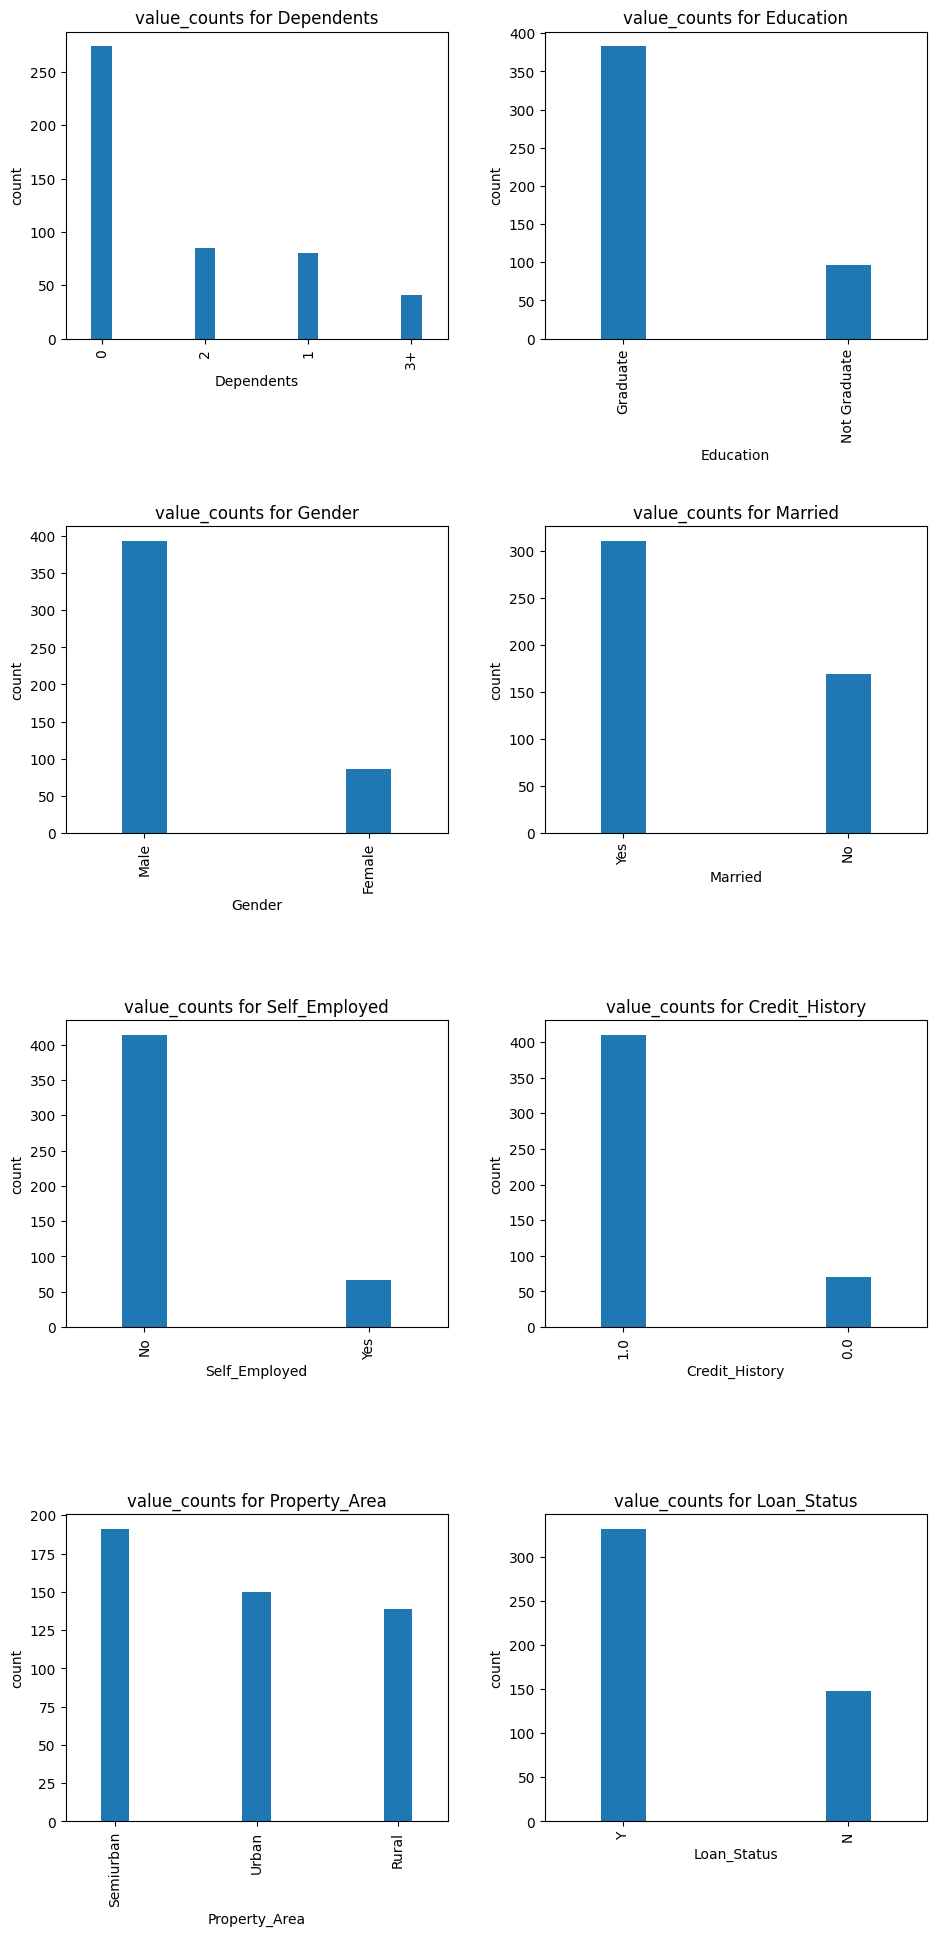

In [ ]:
# create the figure
fig = plt.figure(figsize=(10,20))

# Using a for loop to plot 8 subplots
for i, column in enumerate(['Dependents', 'Education', 'Gender', 'Married', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']):
    ax = fig.add_subplot(428+i-7)
    # Drawing a histogram to show value counts of each feature
    removeNA_df[column].value_counts().plot(kind='bar', ax=ax, width=0.2)  # adjust the width here
    # Subplot and axis titles according to each column
    ax.set_title(f'value_counts for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('count')
plt.tight_layout(pad=3.0)  # adjust padding between subplots
plt.show()

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


<Axes: xlabel='Gender'>

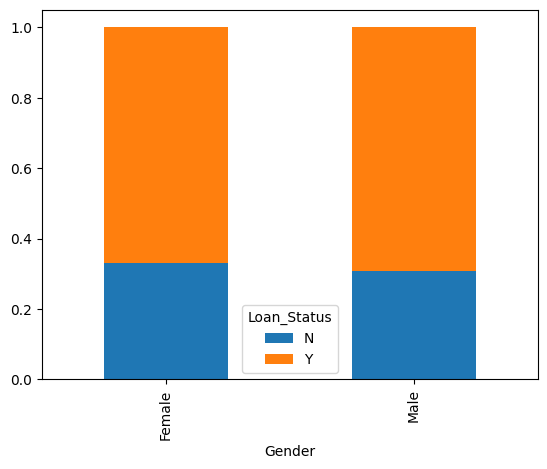

In [ ]:
#Ploting the acceptence/rejection of loans for different genders after cross tabbing between the two columns
#pd.crosstab(removeNA_df['Gender'],removeNA_df['Loan_Status']).plot(kind='bar')


# It is better if you do it this way !!!!!!!! (when you're going to re-arrange data before plotting use the original data frame )

G = pd.crosstab(combined_df['Gender'],combined_df['Loan_Status'], normalize = 'index')
print (G)
G.plot(kind='bar', stacked=True)

Does the Gender affect the acceptance of the Loan?

**Based on the acceptance (orange) bars, it looks like loan acceptance is affcted by gender as the number of males with accpeted loan requests is significantly more than that of females. However, I believe it is safe to say the fact that almost 80% of the data is of male records introduces bias. Based on this, gender should not affect loan acceptance/rejection predicted by the model.**

Do the same with Credit_history and Loan_Status

<Axes: xlabel='Credit_History'>

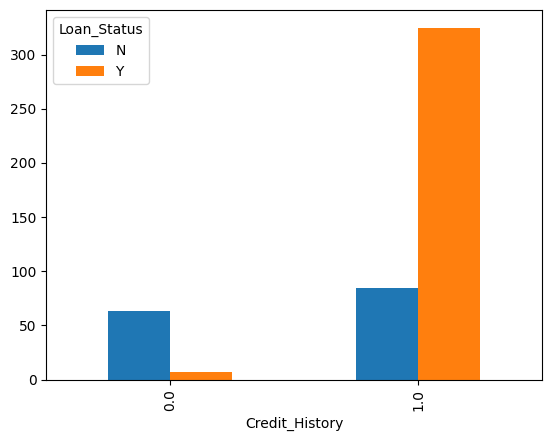

In [ ]:
#Ploting the acceptence/rejection of loans for different credit history data after cross tabbing between the two columns
pd.crosstab(removeNA_df['Credit_History'],removeNA_df['Loan_Status']).plot(kind='bar')

Does the Credit History affect the acceptance of the Loan?

**The accpetance bar of persons with no credit histroy is very small compared to persons with credit histroy. This suggests that credit History affects loan acceptance, which makes sense because it shows a person's responisble (or unresponsible) spending history.It is important for the model.**

Do the same with Dependents and Loan_Status

<Axes: xlabel='Dependents'>

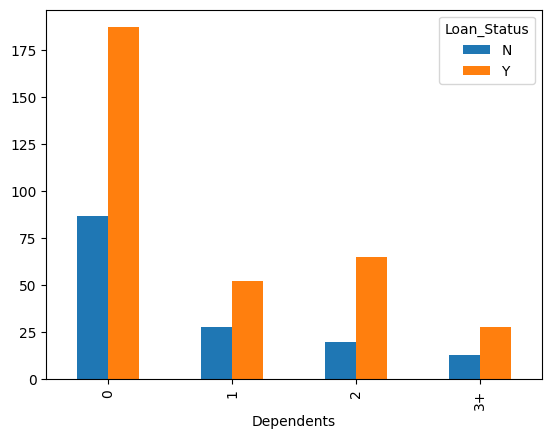

In [ ]:
#Ploting the acceptence/rejection of loans for different number of dependents after cross tabbing between the two columns
pd.crosstab(removeNA_df['Dependents'],removeNA_df['Loan_Status']).plot(kind='bar')

Does the number of dependents affect the acceptance of the Loan?

**Yes, the plot shows that your loan request is more likely to be accepted if you had no children. This makes sense because, having more children usually means more spending (financial support of children by parents). This means that dependents is an important feature for the model.**

Do the same between Education and Loan_Status

<Axes: xlabel='Education'>

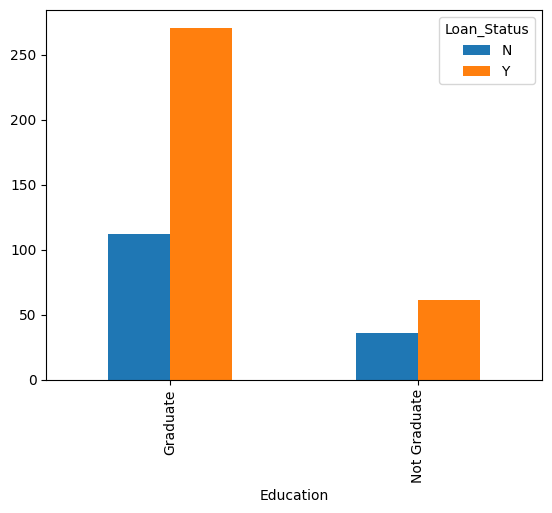

In [ ]:
#Ploting the acceptence/rejection of loans for different education status after cross tabbing between the two columns
pd.crosstab(removeNA_df['Education'],removeNA_df['Loan_Status']).plot(kind='bar')

Does the level of education affect the acceptance of the Loan?

**Yes, it is clear that the level of education affects loan acceptance, graduates' accpeted loans are about 3.5 times higher than that of non graduates. After considereing social practices, I thought this was important to keep, even though applicant income column is also an indication of education level (generally, people with higher degrees tend to land and work in jobs of higher salaries).**

Do the same between Married and Loan_Status

<Axes: xlabel='Married'>

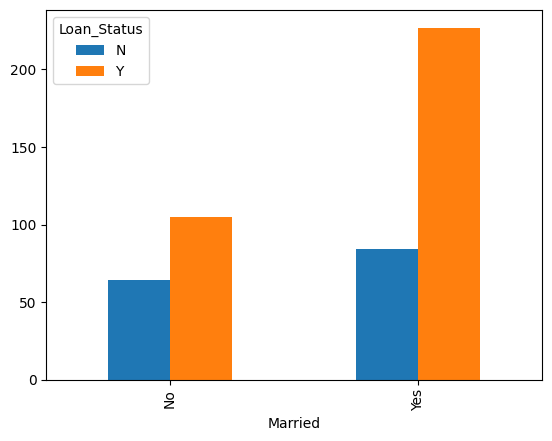

In [ ]:
#Ploting the acceptence/rejection of loans for different maretial status after cross tabbing between the two columns
pd.crosstab(removeNA_df['Married'],removeNA_df['Loan_Status']).plot(kind='bar')

Does the marriage affect the acceptance of the Loan?

**Yes, number of accepted loans for married people looks to be double the number for unmarried ones. I believe this is because being married is more likely to mean that there will be a second source of income that could build towards paying the loan back (coapplicant income).Having recognized that, the married and co-applicant income columns are essentially saying the same thing and only one would be more valuable to the modeling process (coapplicant income is numerical).**

Do the same between Property_Area and Loan_Status

<Axes: xlabel='Property_Area'>

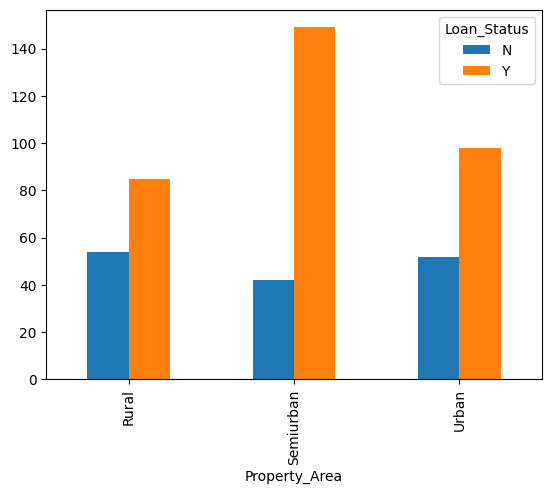

In [ ]:
#Ploting the acceptence/rejection of loans for different preperty areas after cross tabbing between the two columns
pd.crosstab(removeNA_df['Property_Area'],removeNA_df['Loan_Status']).plot(kind='bar')

Does the Property Area affect the acceptance of the Loan?

**It looks like more loans are accepted for people in semiurban areas, however, the three accpetance bars shape follow a bell curve, which suggests a normal distribution. Since this loan data does not mention the puropose of the loan, property area should not effect loan accpetance unless its a mortgage loan.**

Do the same between Self_Employed and Loan_Status

<Axes: xlabel='Self_Employed'>

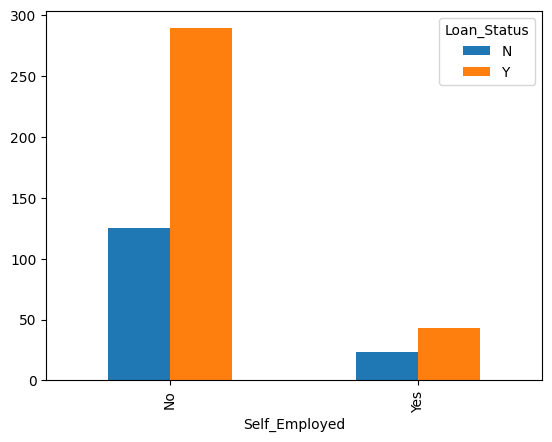

In [ ]:
#Ploting the acceptence/rejection of loans for different employment status after cross tabbing between the two columns
pd.crosstab(removeNA_df['Self_Employed'],removeNA_df['Loan_Status']).plot(kind='bar')

Does the Self Employed Property affect the acceptance of the Loan?

**Yes, the plot suggests that your loan request will more likely be accepted if you were not self employed. This maybe becasue of the generalization that "you would have a more stable income being (company) employed than being self employed" and income stability directly affects how much of the loan a person can pay per loan amount term.**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

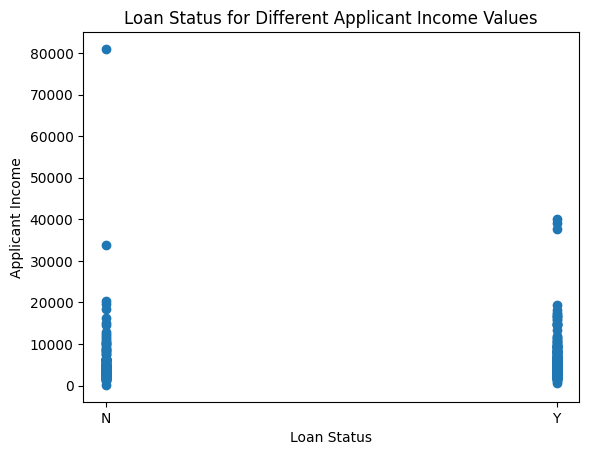

In [ ]:
#Scatter plot between Loan_Status and ApplicantIncome
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['ApplicantIncome'])
plt.title("Loan Status for Different Applicant Income Values")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income")
plt.show()

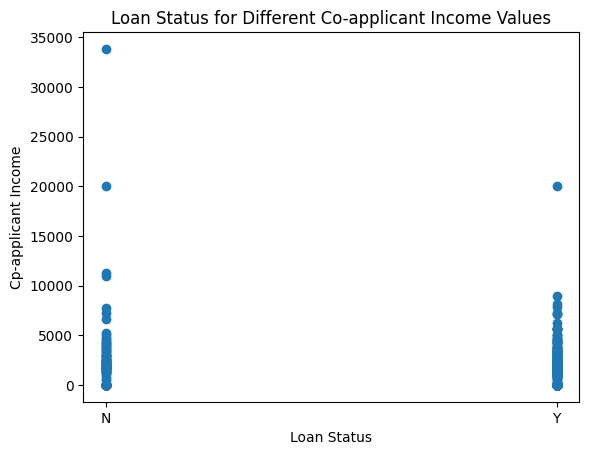

In [ ]:
#Scatter plot between Loan_Status and Coapplicant income
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['CoapplicantIncome'])
plt.title("Loan Status for Different Co-applicant Income Values")
plt.xlabel("Loan Status")
plt.ylabel("Cp-applicant Income")
plt.show()

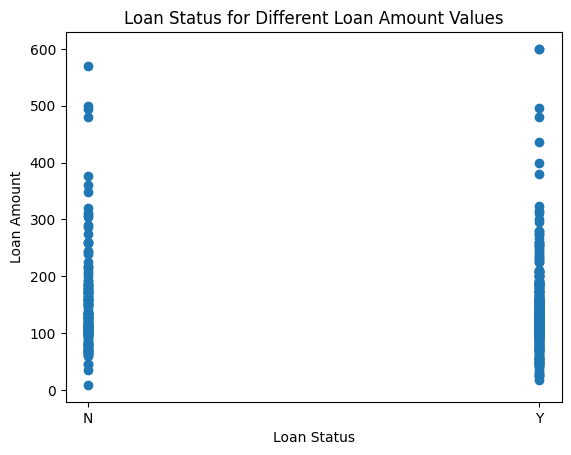

In [ ]:
#Scatter plot between Loan_Status and Loan amount
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['LoanAmount'])
plt.title("Loan Status for Different Loan Amount Values")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

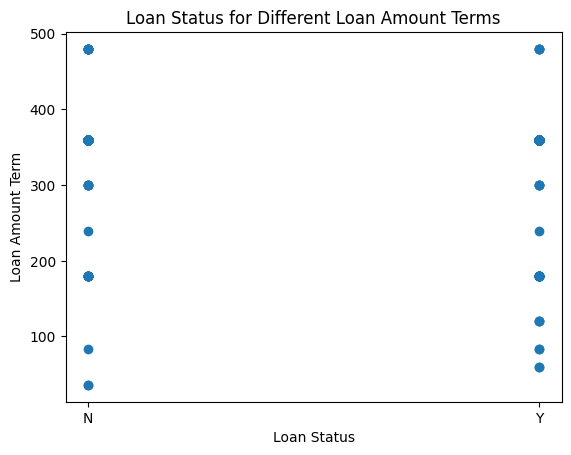

In [ ]:
#Scatter plot between Loan_Status and Loan amount term
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['Loan_Amount_Term'])
plt.title("Loan Status for Different Loan Amount Terms")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount Term")
plt.show()

Do you think these scatter plots gave you valuable information about the Loan_Status?

**No, I don't think that these scatar plots gave valuable insights, I was not able to understand the type of correlation that loan status has with each of the four features.**

Group your dataframe by Loan_Status on the median Value

In [ ]:
#Grouping the dataframe by Loan status on the median value of loan amount, applicant income, coapplicant income and loan amount term repectively

#removeNA_df.groupby('Loan_Status')['LoanAmount'].median()
'''
by_loan_amount = removeNA_df.groupby('Loan_Status')['LoanAmount'].median()
print(by_loan_amount)

by_applicant_income = removeNA_df.groupby('Loan_Status')['ApplicantIncome'].median()
print(by_applicant_income)

by_coapplicant_income = removeNA_df.groupby('Loan_Status')['CoapplicantIncome'].median()
print(by_coapplicant_income)

by_loan_amount_term = removeNA_df.groupby('Loan_Status')['Loan_Amount_Term'].median()
print(by_loan_amount_term)
'''

# ERROR :combined_df.groupby('Loan_Status').median()
''' USE THIIISSSSSSSS '''
# Select only the numeric columns before calculating the median.
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
combined_df.groupby('Loan_Status')[numeric_cols].median()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
N,3833.5,268.0,129.0,360.0
Y,3812.5,1239.5,126.0,360.0


What did you deduce?

**Loan status values can either be yes or no, meaning there are just two discrete values on the x-axis, not a series of distinct values. Using a scatter plot to figure out the correlation between loan status and each of the four features is not an ideal choice. In addition, the result of the second commented line seems to reorganize the data based on the median of Loan_ID column, which is infeasble because the median function deals with nurmerical data. Giving identifications to data cells is what we do to organize data for easy access and it is not important for our model.**

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: standarize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status

In [ ]:
#Removing unused columns
combined_df.drop(['Loan_ID','Gender', 'Married', 'Property_Area'], axis=1, inplace = True)

combined_df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [ ]:
#Replacing '3+' with '3' in Dependents column
combined_df['Dependents'] = combined_df['Dependents'].replace('3+', 3)

combined_df.head(20)

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y
6,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Y
7,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,N
8,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Y
9,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,N


##Convert continuous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [ ]:
#Loan_Amount_term data is continious, it should be converted into categorical data
#36, 60, 84, 120, 180, 240, 300, 360, 480 can be divided into short term : less than 120, medium term: between 120 and 240, and long term :greater than 240

#Defining a lambda function to categorize the loan amount term data based on details about
combined_df['Loan_Amount_Term'] = combined_df['Loan_Amount_Term'].apply(lambda x: 'short term' if x < 120 else
                                                                'medium term' if x <= 240 else
                                                                'long term')

combined_df.head(20)



# SHOULD BE CREDIT HISTORY !!!!!!!!!!!!! BECAUSE THAT'S HOW ITS DESCRIBED IN AT THE START


,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,long term,1.0,Y
1,1,Graduate,No,4583,1508.0,128.0,long term,1.0,N
2,0,Graduate,Yes,3000,0.0,66.0,long term,1.0,Y
3,0,Not Graduate,No,2583,2358.0,120.0,long term,1.0,Y
4,0,Graduate,No,6000,0.0,141.0,long term,1.0,Y
5,2,Graduate,Yes,5417,4196.0,267.0,long term,1.0,Y
6,0,Not Graduate,No,2333,1516.0,95.0,long term,1.0,Y
7,3,Graduate,No,3036,2504.0,158.0,long term,0.0,N
8,2,Graduate,No,4006,1526.0,168.0,long term,1.0,Y
9,1,Graduate,No,12841,10968.0,349.0,long term,1.0,N


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continuous data with mean


In [ ]:
#Checking the number of missing data in each column
combined_df.isnull().sum()

,0
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0
Credit_History,50
Loan_Status,0


**Dependents, Self_Employed,and Credit_History will be filled with mode. LoanAmount will be filled with mean.**

In [ ]:
#Filling data in Dependents, Self_Employed, and Credit_History with mode of columns respectivley
combined_df['Dependents'] = combined_df['Dependents'].fillna(combined_df['Dependents'].mode()[0])

combined_df['Self_Employed'] = combined_df['Self_Employed'].fillna(combined_df['Self_Employed'].mode()[0])

combined_df['Credit_History'] = combined_df['Credit_History'].fillna(combined_df['Credit_History'].mode()[0])

#Filling data in LoanAmount with mean of LoanAmount column
combined_df['LoanAmount'] = combined_df['LoanAmount'].fillna(combined_df['LoanAmount'].mean())

combined_df.head(20)


,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,No,5849,0.0,146.412162,long term,1.0,Y
1,1,Graduate,No,4583,1508.0,128.000000,long term,1.0,N
2,0,Graduate,Yes,3000,0.0,66.000000,long term,1.0,Y
3,0,Not Graduate,No,2583,2358.0,120.000000,long term,1.0,Y
4,0,Graduate,No,6000,0.0,141.000000,long term,1.0,Y
5,2,Graduate,Yes,5417,4196.0,267.000000,long term,1.0,Y
6,0,Not Graduate,No,2333,1516.0,95.000000,long term,1.0,Y
7,3,Graduate,No,3036,2504.0,158.000000,long term,0.0,N
8,2,Graduate,No,4006,1526.0,168.000000,long term,1.0,Y
9,1,Graduate,No,12841,10968.0,349.000000,long term,1.0,N


## Check if any null value exist

In [ ]:
#Checking for null values in the modified dataframe
combined_df.isnull().sum()

,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Loan_Status,0


## Encode categorical data

Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [ ]:
# The categorical features that I would need to change are Self_Employed , Education and Loan_Amount_Term, Dependents is already in numercial form

# Define dictionary for Self_Employed
Employment_Status = {'No':0, 'Yes':1}
# replace Self_Employed column with 0/1
combined_df['Self_Employed'] = combined_df['Self_Employed'].apply(lambda x: Employment_Status[x])


#print head for verification
combined_df.head(20)



,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,Graduate,0,5849,0.0,146.412162,long term,1.0,Y
1,1,Graduate,0,4583,1508.0,128.000000,long term,1.0,N
2,0,Graduate,1,3000,0.0,66.000000,long term,1.0,Y
3,0,Not Graduate,0,2583,2358.0,120.000000,long term,1.0,Y
4,0,Graduate,0,6000,0.0,141.000000,long term,1.0,Y
5,2,Graduate,1,5417,4196.0,267.000000,long term,1.0,Y
6,0,Not Graduate,0,2333,1516.0,95.000000,long term,1.0,Y
7,3,Graduate,0,3036,2504.0,158.000000,long term,0.0,N
8,2,Graduate,0,4006,1526.0,168.000000,long term,1.0,Y
9,1,Graduate,0,12841,10968.0,349.000000,long term,1.0,N


In [ ]:
# Define dictionary for Education
EducationLevel = {'Not Graduate':0, 'Graduate':1}
# replace Education column with 0/1
combined_df['Education'] = combined_df['Education'].apply(lambda x: EducationLevel[x])


#print head for verification
combined_df.head(20)

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,5849,0.0,146.412162,long term,1.0,Y
1,1,1,0,4583,1508.0,128.000000,long term,1.0,N
2,0,1,1,3000,0.0,66.000000,long term,1.0,Y
3,0,0,0,2583,2358.0,120.000000,long term,1.0,Y
4,0,1,0,6000,0.0,141.000000,long term,1.0,Y
5,2,1,1,5417,4196.0,267.000000,long term,1.0,Y
6,0,0,0,2333,1516.0,95.000000,long term,1.0,Y
7,3,1,0,3036,2504.0,158.000000,long term,0.0,N
8,2,1,0,4006,1526.0,168.000000,long term,1.0,Y
9,1,1,0,12841,10968.0,349.000000,long term,1.0,N


In [ ]:
# Define dictionary for Loan_Amount_Term
LoanPeriod = {'short term':0, 'medium term':1 , 'long term':2}
# replace Loan_Amount_Term column with 0/1/2
combined_df['Loan_Amount_Term'] = combined_df['Loan_Amount_Term'].apply(lambda x: LoanPeriod[x])

#print head for verification
combined_df.head(20)


,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,5849,0.0,146.412162,2,1.0,Y
1,1,1,0,4583,1508.0,128.000000,2,1.0,N
2,0,1,1,3000,0.0,66.000000,2,1.0,Y
3,0,0,0,2583,2358.0,120.000000,2,1.0,Y
4,0,1,0,6000,0.0,141.000000,2,1.0,Y
5,2,1,1,5417,4196.0,267.000000,2,1.0,Y
6,0,0,0,2333,1516.0,95.000000,2,1.0,Y
7,3,1,0,3036,2504.0,158.000000,2,0.0,N
8,2,1,0,4006,1526.0,168.000000,2,1.0,Y
9,1,1,0,12841,10968.0,349.000000,2,1.0,N


In [ ]:
# Define dictionary for Loan_Status
status = {'N':0, 'Y':1}
# replace Loan_Amount_Term column with 0/1/2
combined_df['Loan_Status'] = combined_df['Loan_Status'].apply(lambda x: status[x])

#print head for verification
combined_df.head(20)

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,1,0,5849,0.0,146.412162,2,1.0,1
1,1,1,0,4583,1508.0,128.000000,2,1.0,0
2,0,1,1,3000,0.0,66.000000,2,1.0,1
3,0,0,0,2583,2358.0,120.000000,2,1.0,1
4,0,1,0,6000,0.0,141.000000,2,1.0,1
5,2,1,1,5417,4196.0,267.000000,2,1.0,1
6,0,0,0,2333,1516.0,95.000000,2,1.0,1
7,3,1,0,3036,2504.0,158.000000,2,0.0,0
8,2,1,0,4006,1526.0,168.000000,2,1.0,1
9,1,1,0,12841,10968.0,349.000000,2,1.0,0


In [ ]:
#Making sure the Dependents column is of int type (I got an error when trying to normalize as it is originally of type object)
combined_df['Dependents'] = combined_df['Dependents'].astype(int)
print(combined_df.dtypes)

Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term       int64
Credit_History       float64
Loan_Status            int64
dtype: object


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [ ]:
# Getting the max of each column
data_max = combined_df.max()
data_max

# Dividing each column by its maximum value and using the describe function
combined_df = combined_df.divide(data_max)
combined_df.describe()


,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.248100,0.781759,0.133550,0.066709,0.038910,0.209160,0.943811,0.855049,0.687296
std,0.336541,0.413389,0.340446,0.075420,0.070229,0.120054,0.179775,0.352339,0.463973
min,0.000000,0.000000,0.000000,0.001852,0.000000,0.012857,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.035525,0.000000,0.143214,1.000000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,0.047068,0.028524,0.184286,1.000000,1.000000,1.000000
75%,0.333333,1.000000,0.000000,0.071543,0.055134,0.235357,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Training & Validating

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%).

In [ ]:
# Storing all columns except last one as inputs in X
x = combined_df.iloc[:,0:-1].values
# Storing the last column as the output (label) in y
y = combined_df.iloc[:,-1].values

# split dataset in a 70/30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(429, 8) (429,)
(185, 8) (185,)


##Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [ ]:
# Defining the regression model
model = LogisticRegression()

# Trainig the model
model.fit(x_train, y_train)
print('Model finished training!')

Model finished training!


##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [ ]:
#Validating model on test data

# Making predictions
predictions = model.predict(x_test)

# Denormalizing predictions (optional)
denormalized_predictions = predictions * data_max.values[-1]

# Printing denormalized predictions
print(denormalized_predictions)


#Computing the model's accuracy score
print('Model predicted acceptence of loan with a score of: {}'.format(model.score(x_test,y_test)))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
Model predicted acceptence of loan with a score of: 0.7837837837837838


In [ ]:
print(f"The accpetance of loan for someone who has {x_train[0][0]*data_max[0]} dependents, has {x_train[0][1]*data_max[1]} education status, has  {x_train[0][2]*data_max[2]} employment status , earns {x_train[0][3]*data_max[3]} as income in thousands, has {x_train[0][4]*data_max[4]} co-applicant income, requested the following {x_train[0][5]*data_max[5]} loan amount , over the following loan period {x_train[0][6]*data_max[6]}, and has this {x_train[0][7]*data_max[7]} credit history, is around {model.predict([x_train[0]])*data_max[-1]}")

The accpetance of loan for someone who has 0.0 dependents, has 0.0 education status, has  0.0 employment status , earns 2454.0 as income in thousands, has 2333.0 co-applicant income, requested the following 181.0 loan amount , over the following loan period 2.0, and has this 0.0 credit history, is around [0.]


<ipython-input-49-20c7cf8a3bc9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The accpetance of loan for someone who has {x_train[0][0]*data_max[0]} dependents, has {x_train[0][1]*data_max[1]} education status, has  {x_train[0][2]*data_max[2]} employment status , earns {x_train[0][3]*data_max[3]} as income in thousands, has {x_train[0][4]*data_max[4]} co-applicant income, requested the following {x_train[0][5]*data_max[5]} loan amount , over the following loan period {x_train[0][6]*data_max[6]}, and has this {x_train[0][7]*data_max[7]} credit history, is around {model.predict([x_train[0]])*data_max[-1]}")
<ipython-input-49-20c7cf8a3bc9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

#7. Feature Importance

Evaluate the feature importance in your resulting model, and plot it

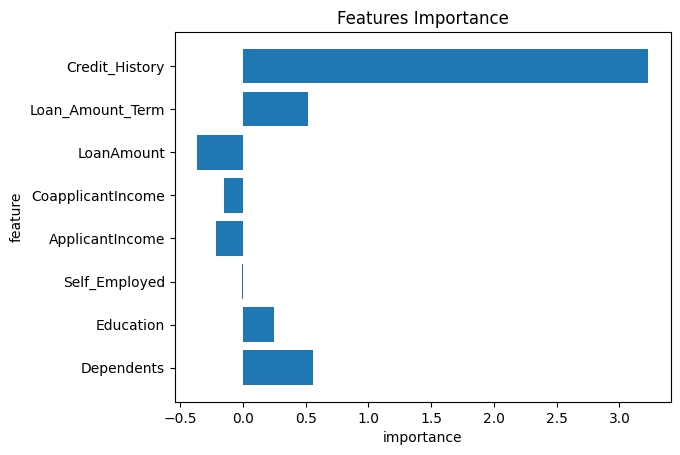

In [ ]:
#Evaluating feature importance
columns_names = combined_df.columns[0:-1].values
features_importance = model.coef_

# Reshape feature importance to a 1D array if necessary
features_importance = features_importance.reshape(-1)  # This flattens the array


plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

What's the most important feature?

**The most important feature is Credit_History as suggested by the graph above. My model accuracy score is very low which could be due to the features I have included and considered as important. I am not sure what the negative correlations imply in this case.**